<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/Assugnment_18%5BNeural_Network%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbo

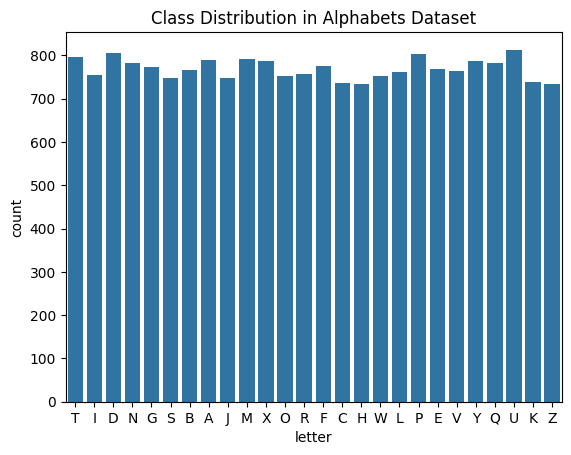

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Alphabets_data.csv')

# Data exploration
print(data.head())       # Display the first few rows of the dataset
print(data.info())       # Summary of the dataset including data types and missing values
print(data.describe())   # Descriptive statistics

# Check for missing values
print(data.isnull().sum())

# Handle missing values if necessary (e.g., imputation or removal)
# Example: data.fillna(data.mean(), inplace=True)

# Separating features and target labels
X = data.drop('letter', axis=1)  # Assuming 'letter' is the target column
y = data['letter']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Visualizing the distribution of classes
sns.countplot(x=y)
plt.title('Class Distribution in Alphabets Dataset')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# ... (your existing code to load and preprocess data)

# Convert string labels to numerical representation using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define the model
model = Sequential()

# Input layer and one hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))  # Second hidden layer

# Output layer with the correct number of classes
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2881 - loss: 2.5802 - val_accuracy: 0.6725 - val_loss: 1.2023
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6983 - loss: 1.0594 - val_accuracy: 0.7516 - val_loss: 0.8844
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7762 - loss: 0.7999 - val_accuracy: 0.7909 - val_loss: 0.7399
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.6578 - val_accuracy: 0.8122 - val_loss: 0.6527
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8321 - loss: 0.6062 - val_accuracy: 0.8325 - val_loss: 0.5848
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8478 - loss: 0.5355 - val_accuracy: 0.8462 - val_loss: 0.5323
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8584 - loss: 0.4910 - val_accuracy: 0.8562 - val_loss: 0.4972
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8714 - loss: 0.4396 - val_accuracy: 0.8681 - val_

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import RandomSearch # import the installed keras tuner

def build_model(hp):
    model = Sequential()

    # First hidden layer
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))

    # Second hidden layer (optional)
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))

    # Output layer
    model.add(Dense(len(y.unique()), activation='softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Use RandomSearch for hyperparameter tuning
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir')

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best hyperparameters: {best_hps.values}")

# Train the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Trial 5 Complete [00h 01m 24s]
val_accuracy: 0.9504166642824808

Best val_accuracy So Far: 0.9504166642824808
Total elapsed time: 00h 08m 16s
Best hyperparameters: {'units': 288, 'learning_rate': 0.001}
Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5579 - loss: 1.6388 - val_accuracy: 0.8197 - val_loss: 0.6125
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8427 - loss: 0.5260 - val_accuracy: 0.8838 - val_loss: 0.4123
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8911 - loss: 0.3555 - val_accuracy: 0.9147 - val_loss: 0.3047
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9241 - loss: 0.2562 - val_accuracy: 0.9100 - val_loss: 0.2750
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9398 - loss: 0.2030 - val_accuracy: 0.9312 - val_loss: 0.2230
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9491 - loss: 0.1640 - val_accuracy: 0.9362 - val_loss: 0.1982
Epoch 7/20
400/400 ━━━━━━━━━━

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import RandomSearch # import the installed keras tuner
import numpy as np # import numpy

# ... rest of the code remains the same ...

from sklearn.metrics import classification_report, confusion_matrix

# Predicting on test data
y_pred = best_model.predict(X_test) # use the best_model variable here
y_pred_classes = [np.argmax(element) for element in y_pred]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

# Accuracy, precision, recall, and F1-score are available in the classification report

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.90      0.97      0.93       153
           2       0.99      0.94      0.97       137
           3       0.96      0.97      0.96       156
           4       0.96      0.98      0.97       141
           5       0.96      0.94      0.95       140
           6       0.99      0.95      0.97       160
           7       0.89      0.94      0.92       144
           8       0.97      0.92      0.94       146
           9       0.95      0.97      0.96       149
          10       0.99      0.87      0.93       130
          11       0.93      0.99      0.96       155
          12       0.99      0.98      0.99       168
          13       0.99      0.95      0.97       151
          14       0.98      0.97      0.97       145
          15       0.94      0.98      0.96       173
          16    